
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/la-conga-machinelearning/la-conga-machinelearning-student/-/raw/main/imgs/banner_DA.png"  width="1000px" height="250px">


# <center> **06. Deep Neural Networks and the Backpropagation** </center>



## **Outline**
1. **From Logistic regresion to Neural Networks (NNs)**
2. **Deep Neural Networks (DNN): the Forward step**
3. **Backpropagation: the DNN Backward step**
4. **DNN in Tensorflow with KERAS**



In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "ML-20221-Laconga" #@param {type:"string"}
assignment_id = group_id +'.machine_learning'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title 1. MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2/la-conga-machinelearning-studen')
print(os.getcwd())

In [ ]:
#@title Load libraries { display-mode: "form" }
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets

# 1. **From Logistic regresion to Neural Networks (NNs)**

The (logistic)-regression $ y = w_0 + w_1 x_1+  w_2 x_2 + \ldots = w^{T}X$ could be represented as a neural graph:


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/dl1.jpg" >



Why a relationship with **biological neurons**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/singleN.png" >






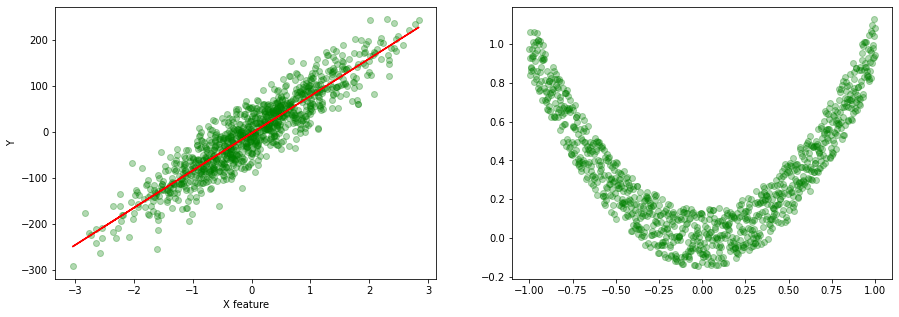

In [ ]:
#@title **logistic regression or neural network?**

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

w_0 =  -2.80#@param {type:"number"}
w_1 =  80.92#@param {type:"number"}


np.random.seed(1)
scaler_l = StandardScaler()

#-----------------------lin  -----------------
X_l, Y_l = make_regression(n_samples=1000, n_features=1,\
                       n_informative=1,random_state=0, noise=35)

X_l_scal = scaler_l.fit_transform(X_l)
y_est=w_0 +w_1*X_l_scal
#-------------------- pol ------------------
x_pol = np.linspace(-1,1,1000)
y_pol = x_pol**2 + (np.random.random(x_pol.shape)-0.5)*0.3

#------------------------------------------

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_l_scal, Y_l, c="green", alpha=0.3)
ax.plot(X_l_scal , y_est, c="red")
ax.set_xlabel('X feature')
ax.set_ylabel('Y')
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x_pol, y_pol, c="green", alpha=0.3)

## **But** what about with non linear boundaries?

## R:/  TO ADD HIDDEN LAYERS: TO BE DEEP!!

In fact, the biological systems works in similar way...


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/neurons-and-dl2.png" >

### **Deep Neural networks**

DNN is a machine learning strategy based on a collection of connected **neuron units**, inspired  in biological systems, that uses **multiple layers** to progressively extract **higher level representations**. 

- **Neurons:** basic units that code a relationship between inputs in previous layers. 
- **input Layers:**  are new information, namely a vectorized version of each sample.
- **Hidden Layers:** are internal correlation on the network, which do the **magic!**. The input units and previous layers are correllated wit some **learned weights**. 
- **activation functions:** introduce non-linearity into the output of a neuron. This is important because most real world data is non linear and we want neurons to learn these non linear representations.
    - *Softmax*, used in classification tasks, takes a vector of arbitrary real-valued scores and squashes it to a vector of values between zero and one to ensure that the outputs are probabilities. 
  
- **output Layers** Give the result on correlation of network units, and namelly is mapped to a **sofmax function** to give a probability of each class.

<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/DNN_1.png" width="600" ></center>

The operation of the network is based on the computation of successive operations at each **neuron** ($a$), defined as: 

$$a_{j}^{l}=\sigma(z_{j}^{l})$$

$$z_{j}^{l}=\sum_{k}w_{j,k}^{l}a_{k}^{l-1}+b_{j}^{l},$$ 

where: 

- $w_{j,k}^{l}$ indicates the weights or coefficients of the **linear model** of each neuron. Specifically, 
- $l$ indicates the layer, 
- $j$ indicates the output neuron
- $k$ indicates the input neuron. 
- The $\sigma$ function (**the activation**)indicates a transformation function such as **sigmoid** or **logit** function. This function induces non-linearity to adjust model to more complex data. 
- The graphics do not consider bias for simplicity.

The **output net** defines the problem: 

- **The regression problems** with a single neuron in the output layer. 

- **The classification problems** usually define one neuron for each class and the activation is a *softmax*. 


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- The above net schemes are for regression or for classification problem?

The architecture presented is known as Feed Forward neural network and is one of the most basic structures. There exist a wide number of architectures are presented: [The neural network zoo](https://www.asimovinstitute.org/neural-network-zoo/). 



The DNN is operated in two ways: 

1. A forward propagation step, for test, to compute the output of the network. 
2. A backward propagation step, for training, in which the error at the end of the network is propagated backward through all the neurons while updating their parameters. (**Sounds like a gradient, doesn't it?**). 
 - This step include iteratively (backward-forward)

# 2. **Deep Neural Networks (DNN): The Forward step**


During the forward step, the input will be propagated to the output net.


- The output of each neuron is obtained from output of neurons in previous layer, defined as: $z_{j}^{l}=Z^{l}=W^{l}\cdot A^{l-1}+b^{l},$
where $A^0=Inputs$

- The calculation of "$A$" is involved into a transformation or activation function, as sigmoid function: $\sigma(Z) = \frac{1}{1+e^{-Z}}$

To toy net (illustrated above) there is two set of weights: $W_1$ ( connect the input layer with the hidden layer) and $W_2$ ( connect the hidden layer with the output layer). Each set is arranged in a matrix
  - These weights are arrenged in a matrix with rows as the number of neurons in the next layer and the number of columns indicate the neurons in the previous layer, as: 

| | |
|:-------------------------:|:-------------------------:|
|$$\large W_1=W_{[j=1:3,k=1:2]}^{l=2}=\left( \begin{matrix} 
w_{1,1}^2 & w_{1,2}^2 \\
w_{2,1}^2 & w_{2,2}^2 \\
w_{3,1}^2 & w_{3,2}^2 
\end{matrix} \right)$$ |  <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/DNN_1_1.png" width="400" >|







For instance, we will run the  `make_regression` with two variables: 

In [ ]:
#@title **code:** load data
scaler_l = StandardScaler()
X_l, Y_l = make_regression(n_samples=5000, n_features=2,
                                      n_informative=2, noise=10,
                                      coef=False, random_state=0)
X_l_scal = scaler_l.fit_transform(X_l)
print(X_l_scal.shape, Y_l.shape)

(5000, 2) (5000,)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Implement forward propagation for next weights
- Drawn the computed stimations 
- It is magic, How did the weights appear?

In [ ]:
#@title **code:** weights 
W1 = np.array([[-0.73731834, -4.9123926 ],
       [-0.9785055 , -3.6975048 ],
       [ 0.9115143 ,  3.8996382 ]])
b1 = np.array([[ 5.4024553],[-0.8736336],[ 5.9712057]])

W2= np.array([[-59.251694, -55.481842,  60.09115 ]])
b2= np.array([23.147457])
print("W1= ", W1.shape, "b1= ", b1.shape, " W2= ", W2.shape, " b2 =", b2.shape)

W1=  (3, 2) b1=  (3, 1)  W2=  (1, 3)  b2 = (1,)


In [ ]:
#@title **code student:** testing forward 
def forward_Z2_function(W1, W2, b1, b2, X_l_scal):
  #Please import numpy first
  Z1 = ...
  print(Z1.shape)
  A1 = ...
  Z2 = ...
  return Z2
Z2 = forward_Z2_function(W1, W2, b1, b2, X_l_scal)
print("Z2: \n", Z2)
print(Z2.shape)

Text(0, 0.5, 'Y')

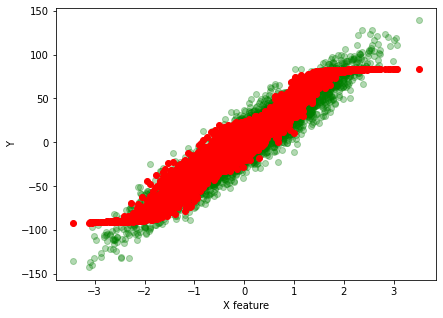

In [ ]:
#@title plot results

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_l_scal[:,1], Y_l, c="green", alpha=0.3)
ax.scatter(X_l_scal[:,1] , Z2, c="red")
ax.set_xlabel('X feature')
ax.set_ylabel('Y')


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Implement forward propagation for next weights
- Drawn the computed stimations 
- It is magic, How did the weights appear?

In [ ]:
#@title **code student:** testing on more complex data

x_pol = np.linspace(-1,1,5000)
y_pol = x_pol**2 + (np.random.random(x_pol.shape)-0.5)*0.3
x2d_pol =np.array([np.linspace(-1,1,5000), np.linspace(0,1,5000)]).T

W1 = np.array([[ 2.084589  ,  1.7026256 ],
       [ 2.3564532 , -0.07287475],
       [ 1.0032609 ,  0.74192464]])
b1 = np.array([[ 1.5538876 ],[-2.294058  ],[ 0.29662362]])

W2= np.array([[-2.0751796 ,  2.8317351 , -0.15121211]])
b2= np.array([1.7383667])
print(W1.shape,  b1.shape, W2.shape, b2.shape)

# implement Forward...
def implement_forward_Z2(W1, W2, b1, b2, x2d_pol):
  #Import all the functions that are required....

  Z2 =  ...
  return Z2

print("Z2: \n", Z2)


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x2d_pol[:,0], y_pol, c="green", alpha=0.3)
ax.scatter(x2d_pol[:,0] , Z2, c="red")
ax.set_xlabel('X feature')
ax.set_ylabel('Y')

# 3. **Backpropagation: the DNN Backward step** 
[originalPaper](https://www.nature.com/articles/323533a0)

Now, we need to find the **magic weights!**, which means reduce the cost with respect the weights $\frac{\partial \mathbf{J(W)}}{\partial W}$. 
- We have *the Holy grail*, that is **gradient descent** to effectively find parameters of funtion (set of weigths): 
$$W := W - \alpha \frac{\partial \mathbf{J(W)}}{\partial W}$$

But... $\frac{\partial \mathbf{J(W)}}{\partial W}$ is a very complex expression, so, How to estimate $\frac{\partial\mathbf{J(W)}}{\partial W}$?

R:/ back-progating the error from last layer until first layer. 

The backpropagation is an algorithm to minize iteratively the cost of a DNN. 

#### **3.1 How change error with respect last layer $\frac{\partial J}{\partial w^L, b^{L}}$** ?


<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/DNN_4.png" width="700" ></center>


Because we have **compose function** we should use **chain rule!**

From weights                                          | | From bias
:---------------------------------------------------: | |:---------------------------------------------------:
                                                       | 
$$\large \frac{\partial J}{\partial w^L} = \underset{\delta^{l}}{\underbrace{\frac{\partial J}{\partial a^L}\frac{\partial a^L}{\partial z^L}}}\frac{\partial z^L}{\partial w^L}$$  |     |$$\large \frac{\partial J}{\partial b^L} = \underset{\delta^{l}}{\underbrace{\frac{\partial J}{\partial a^L}\frac{\partial a^L}{\partial z^L}}}\frac{\partial z^L}{\partial b^L}$$

Looks complex, but pay attention: 

1. 


__IF__ $J(a^{L})$                                        |     | __Then__ $\frac{\partial J}{\partial a^L}$
:---------------------------------------------------: |       | :---------------------------------------------------:
                                                       | 
$$ J(a^{L}) = \frac{1}{2m}\sum_{i=1\ldots m}(y_i -a_{i}^{L})^{2}$$  |        |$$ \to \frac{\partial J}{\partial a^L} = (y_i -a_{i}^{L})$$


2. 



__IF__ $a^{L}(z^L)$                                        |     | __Then__ $\frac{\partial a^L}{\partial z^L}$
:---------------------------------------------------: |       | :---------------------------------------------------:
                                                       | 
$$ a^{L}(z^L) = \frac{1}{1+ e^{-z}}$$  |        |$$ \to \frac{\partial a^L}{\partial z^L} = a^{L}(z^L) (1 - a^{L}(z^L))$$

see proof [here](http://www.ai.mit.edu/courses/6.892/lecture8-html/sld015.htm)

3. 


__IF__ $z^{L}$                                        |     | __Then__ $\left [ \frac{\partial z^L}{\partial w^L}, \frac{\partial z^L}{\partial b^L} \right ]$
:---------------------------------------------------: |       | :---------------------------------------------------:
                                                       | 
$$ \large z^{L} = \sum_{i} a_{i}^{L-1}w_{i}^{L} + b^{L}$$  |        |$$\to \left [ \frac{\partial z^L}{\partial b^L}=1, \frac{\partial z^L}{\partial w^L}=a_{i}^{L-1} \right ]$$




#### **3.2 How change error in other layers $\frac{\partial J}{\partial w^{l-1}, b^{l-1}}$** ?

Using same function composition: $J(a^{L}(W^{L}a^{l-1}(W^{l-1}a^{l-2} + b^{l-1})+ b^{L}))$ , we obtain a recursive expression, as: 

From weights                                          | | From bias
:---------------------------------------------------: | |:---------------------------------------------------:
                                                       | 
$$\large  \frac{\partial J}{\partial w^{L-1}} = \underset{\delta^{l}}{\underbrace{\frac{\partial J}{\partial a^{L}}\frac{\partial a^L}{\partial z^L}}} \underset{W^{l}}{\underbrace{\frac{\partial z^L}{\partial a^{L-1}}}} \underset{d(f(x))}{\underbrace{\frac{\partial a^{L-1}}{\partial z^{L-1}}}}
 \underset{a^{l-2}}{\underbrace{\frac{\partial z^{L-1}}{\partial w^{L-1}}}}$$  |     |$$\large  \frac{\partial J}{\partial b^{L-1}} = \underset{\delta^{l}}{\underbrace{\frac{\partial J}{\partial a^{L}}\frac{\partial a^L}{\partial z^L}}} \underset{W^{l}}{\underbrace{\frac{\partial z^L}{\partial a^{L-1}}}} \underset{d(f(x))}{\underbrace{\frac{\partial a^{L-1}}{\partial z^{L-1}}}}
 \underset{a^{l-2}}{\underbrace{\frac{\partial z^{L-1}}{\partial b^{L-1}}}}$$

#### **3.3 In summary**



The summary of algorithm is: 

- Training set: $(\mathbf{x}, \mathbf{y}) = \{x^{i}, y^{i}\}_{i=1 \ldots m}$
- Random initialization of $\mathbf{W}$
- **set** $a^{(1)} = \mathbf{x}$
- Perform Forward prop $\to a^{(l)}, l=2\ldots L$
- Error in last layer. Use $\mathbf{y}$ to compute $\delta^{(L)}$: 
  - $\delta^{(L)} = \frac{\partial J}{\partial a^{L}}\frac{\partial a^L}{\partial z^L}$
- Backpropagate error. To compute $\delta^{(l-1)}, \delta^{(l-2)}, \ldots, \delta^{(2)} $
  - $\delta^{(l-1)} = W^{l}\delta^{(l)}\frac{\partial z^{l-1}}{\partial a^{l-1}}$
- To compute $\sim \frac{\partial}{\partial w_{ij}^{(l)}} \mathbf{J(W)}$
  - $\frac{\partial J}{\partial w^{L-1}} \sim  \delta^{(l-1)}a^{l-2}$
  - $\frac{\partial J}{\partial b^{L-1}} \sim  \delta^{(l-1)} $

So, 
$$W_{i,j}^{l} := W_{i,j}^{l}  \pm \alpha  \frac{\partial \mathbf{J(W)}}{\partial W}$$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What about stocastic gradient descent (SGD)?

**Go to the action!**

# **4. DNN in Tensorflow with KERAS**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_dl.png" alt="Drawing" style="width:1700px;">


Now, we going to use keras to implement DNN and other deep architectures (forward and backpropagation). Firstly, we going to implement the simplest regression nets, as illustrated in the figure: 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/DNN_1_1.png" width="400" >

Now, we will load `TensorFlow` and the dataset `make_regression`

In [ ]:
#@title **code:** load lib and data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

scaler_l = StandardScaler()
X_l, Y_l = make_regression(n_samples=5000, n_features=2,
                                      n_informative=2, noise=10,
                                      coef=False, random_state=0)
X_l_scal = scaler_l.fit_transform(X_l)
print(X_l_scal.shape, Y_l.shape)

(5000, 2) (5000,)


Now, we implement DNN proposed architecture: 

In [ ]:
#@title **code:** built DNN models
model_l =  tf.keras.Sequential([
                             tf.keras.layers.Dense(3, activation='sigmoid', input_shape=[X_l_scal.shape[1]]),
                             tf.keras.layers.Dense(1)])
model_l.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


We can explore DNN of weights at this point, as: 

In [ ]:
#@title **code:** obtain_weights
def obtain_weights(model_l):
  second_layer_weights = model_l.layers[0].get_weights()[0].T
  second_layer_biases  = model_l.layers[0].get_weights()[1]
  second_layer_biases = second_layer_biases.reshape(second_layer_biases.shape[0], 1)
  third_layer_weights = model_l.layers[1].get_weights()[0].T
  third_layer_biases  = model_l.layers[1].get_weights()[1]
  print("L2: ", "\n", second_layer_weights)
  print("b2: ", "\n", second_layer_biases)
  print("L2: ", second_layer_weights.shape, "b2: ", second_layer_biases.shape, " W3: ",third_layer_weights.shape, " b3: ", third_layer_biases.shape  )
obtain_weights(model_l)

L2:  
 [[ 0.4661324  -0.27783114]
 [ 0.03443825  1.0130773 ]
 [-0.37498045  0.7378527 ]]
b2:  
 [[0.]
 [0.]
 [0.]]
L2:  (3, 2) b2:  (3, 1)  W3:  (1, 3)  b3:  (1,)


Now, 
- we define the optimizer, in this case closer version is SGD (stochastic gradient descent)
- fit model (train) by using backpropagation+gradient descent
- evaluate the model

In [ ]:
#@title **code:** train the model
optimizer = tf.keras.optimizers.SGD()
model_l.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
iterations = 500
history = model_l.fit(X_l_scal, Y_l, epochs=iterations,  validation_split = 0.2, verbose=False)

Finally, we can drawn boundaries and see the **magic!**

(5000, 1)


Text(0, 0.5, 'Y')

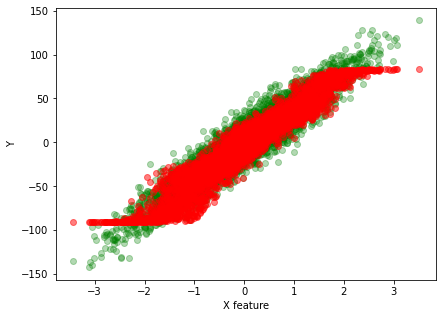

In [ ]:
#@title **code:** predict the model
y_est = model_l.predict(X_l_scal)
print(y_est.shape)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_l_scal[:,1], Y_l, c="green", alpha=0.3)
ax.scatter(X_l_scal[:,1] , y_est, c="red", alpha=0.5)

ax.set_xlabel('X feature')
ax.set_ylabel('Y')

Also, we can evaluate the performance and obtain train weights


In [ ]:
#@title **code:** evaluate the cost
loss, mae, mse = model_l.evaluate(X_l_scal, Y_l)
print(loss, mae, mse)
obtain_weights(model_l)

157/157 [==============================] - 0s 1ms/step - loss: 133.8033 - mae: 9.0494 - mse: 133.8033
133.8032989501953 9.049428939819336 133.8032989501953
L2:  
 [[ 0.7892165   3.459066  ]
 [ 1.4460764   4.2938437 ]
 [-0.97677773 -3.8554735 ]]
b2:  
 [[0.15567848]
 [5.6951427 ]
 [5.4939933 ]]
L2:  (3, 2) b2:  (3, 1)  W3:  (1, 3)  b3:  (1,)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Now, train the same architecture but using `y_pol, x2d_pol` and drawn the results. 

(5000, 2) (5000,)
(5000, 1)


Text(0, 0.5, 'Y')

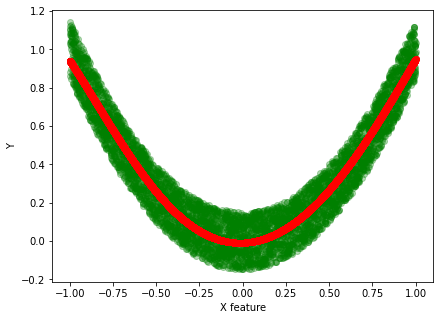

In [ ]:
#@title **code**  solution
x_pol = np.linspace(-1,1,5000)
y_pol = x_pol**2 + (np.random.random(x_pol.shape)-0.5)*0.3
x2d_pol =np.array([np.linspace(-1,1,5000), np.linspace(0,1,5000)]).T
print(x2d_pol.shape, y_pol.shape)
model_pol =  tf.keras.Sequential([
                             tf.keras.layers.Dense(3, activation='sigmoid', input_shape=[x2d_pol.shape[1]]),
                             tf.keras.layers.Dense(1)])
optimizer = tf.keras.optimizers.SGD()
model_pol.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

iterations = 1000

history = model_pol.fit(x2d_pol, y_pol, epochs=iterations, verbose=False)
y_est_pol = model_pol.predict(x2d_pol)
print(y_est.shape)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x2d_pol[:,0], y_pol, c="green", alpha=0.3)
ax.scatter(x2d_pol[:,0] , y_est_pol, c="red")
ax.set_xlabel('X feature')
ax.set_ylabel('Y')

We can play with this application to [tensorflow](https://playground.tensorflow.org/) for a better intuition of Deep neural networks!

# **References**

[1. How the backpropagation algorithm works](http://neuralnetworksanddeeplearning.com/chap2.html)

[2. Playground tensorflow](https://playground.tensorflow.org/)

[3. Backpropagation](https://www.youtube.com/watch?v=eNIqz_noix8)

[4. Matemáticas de Backpropagation](https://www.youtube.com/watch?v=M5QHwkkHgAA)

[5. Neural Networks zoo](https://www.asimovinstitute.org/neural-network-zoo/)

[6. Learning representations by back-propagating errors
](https://www.nature.com/articles/323533a0)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">